# Métodos de Redução do Overfitting

Antes de começar o estudo deste notebook, carregamos a biblioteca keras

In [0]:
import keras
keras.__version__

Using TensorFlow backend.


'2.2.5'

# Over e under fit



O underfitting ocorre quando o erro cai simultaneamente no grupo de treino e no de validação. Isto significa que o modelo está melhorando seu desempenho.

O overfitting ocorre quando a queda do erro no conjunto de treino não é acompanhada por uma queda similar no conjunto de validação. 

Neste momento ocorre o problema mais importante do aprendizado de máquina que é o trade-off entre otimização (quão bem o modelo roda no conjunto de treino) e generalização (quão bem o modelo roda no conjunto de validação). 

Os métodos para evitar o overfitting (isto é o aprendizado de padrões irrelevantes presentes no conjunto de treino) envolvem: 

1.   utilizar mais dados
2.   limitar a quantidade de informações que o modelo é capaz de armazenar
3.   incluir restrições ao tipo de informação que ele irá armazenar. 

O processo de evitar o overfitting é chamado de _regularização_. Vejamos a seguir as técnicas mais comuns em detalhe.


Neste exemplo serão utilizados apenas os conjuntos de treino e teste do modelo IMDB. Não será utilizado o recurso de criar um conjunto de validação pois não queremos estudar o modelo ao final do treino mas sim o que ocorre durante o treino.

In [1]:
from keras.datasets import imdb
import numpy as np

# Carrega os comentários do dataset IMDB. Apenas as 10.000 palavras mais frequentes 
#  entre todas as presentes nos comentários serão carregadas. Isto é efetuado por 
#  num_words=10.000.

# train_data é formado por 25.000 listas de tamanho variável. Cada uma das listas
#  é um conjunto de números que compõe um comentário. 
# train_labels é um array com 25.000 0s e 1s. 0 significa comentário negativo e 
#  1 comentário positivo.
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)

def vectorize_sequences(sequences, dimension=10000):
    # Cria uma matriz de zeros com o formato (len(sequences), dimension)
    #  sequences contém os 25.000 comentários a respeito de filmes do dataset IMDB
    # dimension=10.000 indica o número de colunas que a matriz terá, uma para cada
    #  possível palavra no comentário.  
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        # i indica o comentário que está sendo "dummificado" 
        # sequence é uma lista de números que representa um comentário.
        # results[i, sequence] = 1 torna 1 todas as posições da linha i e
        #  das colunas indicadas em sequence. 
        results[i, sequence] = 1.   
    return results

# Utilizamos a função criada acima para dumificar (isto é vetorizar) os dados
#  de entrada de treino.
x_train = vectorize_sequences(train_data)

# Repetimos o processo para o conjunto de teste
x_test = vectorize_sequences(test_data)

# Em seguida vetorizamos os rótulos. Neste caso o processo é automático pois
#  os rótulos já estão marcados com 0s e 1s. Apenas convertemos o tipo de dado
#  de inteiro para ponto flutuante de 32 bits
y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')

Using TensorFlow backend.


17465344/17464789 [==============================] - 1s 0us/step


# Redução do overfit pela dimininuição do tamanho da rede neural

A forma mais simples de evitar o overfit é reduzir o tamanho do modelo. Para tal diminui-se o número de camadas e/ou o número de neurons por camada. 

O número de camadas e o número de neurons por camada define a "capacidade" do modelo, isto é, o número de parâmetros passíveis de serem "aprendidos" pelo modelo. 

A medida que o modelo tem mais parâmetros ele terá uma capacidade maior de "memorização" isto é de formar um mapeamento perfeito entre cada par de valores de entrada e saida. Este mapeamento no entanto não possui qualquer poder de generalização. Este é o "dilema" dos modelos baseados em deep learning. É necessário o ajuste dos dados de entrada aos dados de saida, mas o objetivo não é o ajuste perfeito no conjunto de treino, mas sim, a descoberta de padrões que sejam passíveis de generalização para o conjunto de teste.

Por outro lado se o modelo tiver poucos parâmetros, isto pode limitar a capacidade do mesmo de aprender os padrões nos dados, diminuindo de novo a capacidade de generalização. 

A correta escolha do número de parâmetros no modelo para evitar o overfit e obter uma boa generalização depende de experimentação durante o desenvolvimento do modelo. Isto torna a pesquisa em deep learning mais uma tarefa de engenharia do que de ciência básica.

O processo envolve começar com poucas camadas e neurons e aumentar os mesmos pouco a pouco acompanhando o efeito no erro nos conjuntos de treino e validação. Toda vez que o modelo diminuir o erro no treino mas esta diminuição não for acompanhada na validação estaremos diante do overfit.

A seguir vamos observar uma sequência de testes em diferentes modelos ajustados para o conjunto de dados IMDB.

Primeiro com o modelo original desenvolvido no exercício anterior.

In [2]:
from keras import models
from keras import layers

original_model = models.Sequential()
original_model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
original_model.add(layers.Dense(16, activation='relu'))
original_model.add(layers.Dense(1, activation='sigmoid'))

original_model.compile(optimizer='rmsprop',
                       loss='binary_crossentropy',
                       metrics=['acc'])






Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Em seguida vamos criar um modelo com menos neurons por camada.

In [0]:
smaller_model = models.Sequential()
smaller_model.add(layers.Dense(4, activation='relu', input_shape=(10000,)))
smaller_model.add(layers.Dense(4, activation='relu'))
smaller_model.add(layers.Dense(1, activation='sigmoid'))

smaller_model.compile(optimizer='rmsprop',
                      loss='binary_crossentropy',
                      metrics=['acc'])

Temos dois modelos. Vamos treinar primeiro o modelo original e em seguida o modelo menor. Em ambos os casos vamos gravar o histórico de treino e apresentar os dois históricos em forma gráfica.

In [4]:
original_hist = original_model.fit(x_train, y_train,
                                   epochs=20,
                                   batch_size=512,
                                   validation_data=(x_test, y_test))




Train on 25000 samples, validate on 25000 samples
Epoch 1/20





25000/25000 [==============================] - 12s 478us/step - loss: 0.4642 - acc: 0.8224 - val_loss: 0.3371 - val_acc: 0.8754
Epoch 2/20
25000/25000 [==============================] - 2s 87us/step - loss: 0.2560 - acc: 0.9091 - val_loss: 0.2860 - val_acc: 0.8888
Epoch 3/20
25000/25000 [==============================] - 2s 87us/step - loss: 0.1986 - acc: 0.9288 - val_loss: 0.2903 - val_acc: 0.8844
Epoch 4/20
25000/25000 [==============================] - 2s 86us/step - loss: 0.1681 - acc: 0.9398 - val_loss: 0.3029 - val_acc: 0.8806
Epoch 5/20
25000/25000 [==============================] - 2s 85us/step - loss: 0.1426 - acc: 0.9508 - val_loss: 0.3181 - val_acc: 0.8778
Epoch 6/20
25000/25000 [==============================] - 2s 86us/step - loss: 0.1274 - acc: 0.9562 - val_loss: 0.3394 - val_acc: 0.8754
Epoch 7/20
25000/25000 [==============================] - 2s 86us/step - loss: 0.1123 - acc: 0.9605 - val_loss: 0.3911

In [5]:
smaller_model_hist = smaller_model.fit(x_train, y_train,
                                       epochs=20,
                                       batch_size=512,
                                       validation_data=(x_test, y_test))

Train on 25000 samples, validate on 25000 samples
Epoch 1/20
25000/25000 [==============================] - 2s 93us/step - loss: 0.5966 - acc: 0.8025 - val_loss: 0.5256 - val_acc: 0.8427
Epoch 2/20
25000/25000 [==============================] - 2s 86us/step - loss: 0.4439 - acc: 0.8701 - val_loss: 0.4095 - val_acc: 0.8672
Epoch 3/20
25000/25000 [==============================] - 2s 86us/step - loss: 0.3401 - acc: 0.8940 - val_loss: 0.3458 - val_acc: 0.8767
Epoch 4/20
25000/25000 [==============================] - 2s 86us/step - loss: 0.2760 - acc: 0.9103 - val_loss: 0.3054 - val_acc: 0.8860
Epoch 5/20
25000/25000 [==============================] - 2s 86us/step - loss: 0.2352 - acc: 0.9212 - val_loss: 0.2871 - val_acc: 0.8901
Epoch 6/20
25000/25000 [==============================] - 2s 86us/step - loss: 0.2070 - acc: 0.9287 - val_loss: 0.2819 - val_acc: 0.8884
Epoch 7/20
25000/25000 [==============================] - 2s 86us/step - loss: 0.1854 - acc: 0.9361 - val_loss: 0.2802 - val_acc

In [0]:
epochs = range(1, 21)
original_val_loss = original_hist.history['val_loss']
smaller_model_val_loss = smaller_model_hist.history['val_loss']

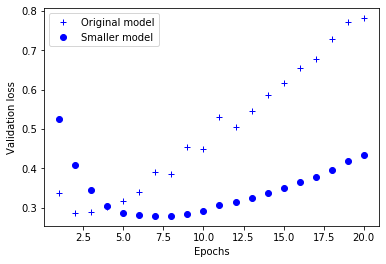

In [7]:
import matplotlib.pyplot as plt

# b+ is for "blue cross"
plt.plot(epochs, original_val_loss, 'b+', label='Original model')
# "bo" is for "blue dot"
plt.plot(epochs, smaller_model_val_loss, 'bo', label='Smaller model')
plt.xlabel('Epochs')
plt.ylabel('Validation loss')
plt.legend()

plt.show()

Como pode ser visto no gráfico acima, o modelo mais simples começa a apresentar overfit com 8 épocas de treino enquanto o modelo mais complexo começa com 5 épocas.

Além disso o desempenho do modelo mais simples degrada de forma muito mais lenta.

Vamos executar agora outro teste, com um modelo bem mais complexo que os anteriores.

In [0]:
bigger_model = models.Sequential()
bigger_model.add(layers.Dense(512, activation='relu', input_shape=(10000,)))
bigger_model.add(layers.Dense(512, activation='relu'))
bigger_model.add(layers.Dense(1, activation='sigmoid'))

bigger_model.compile(optimizer='rmsprop',
                     loss='binary_crossentropy',
                     metrics=['acc'])

In [9]:
bigger_model_hist = bigger_model.fit(x_train, y_train,
                                     epochs=20,
                                     batch_size=512,
                                     validation_data=(x_test, y_test))

Train on 25000 samples, validate on 25000 samples
Epoch 1/20
25000/25000 [==============================] - 3s 130us/step - loss: 0.4682 - acc: 0.8042 - val_loss: 0.2832 - val_acc: 0.8886
Epoch 2/20
25000/25000 [==============================] - 3s 109us/step - loss: 0.2148 - acc: 0.9155 - val_loss: 0.3315 - val_acc: 0.8618
Epoch 3/20
25000/25000 [==============================] - 3s 108us/step - loss: 0.1273 - acc: 0.9524 - val_loss: 0.3820 - val_acc: 0.8702
Epoch 4/20
25000/25000 [==============================] - 3s 107us/step - loss: 0.0612 - acc: 0.9796 - val_loss: 0.3684 - val_acc: 0.8811
Epoch 5/20
25000/25000 [==============================] - 3s 108us/step - loss: 0.0520 - acc: 0.9883 - val_loss: 0.4314 - val_acc: 0.8822
Epoch 6/20
25000/25000 [==============================] - 3s 106us/step - loss: 0.0022 - acc: 0.9998 - val_loss: 0.6246 - val_acc: 0.8808
Epoch 7/20
25000/25000 [==============================] - 3s 105us/step - loss: 0.0731 - acc: 0.9892 - val_loss: 0.6267 - 

Vamos comparar o desempenho do modelo maior com o modelo mais simples. 

Lembrando: o desempenho é medido pela função de erro calculada no conjunto de validação.

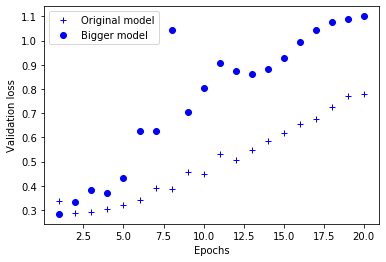

In [10]:
bigger_model_val_loss = bigger_model_hist.history['val_loss']

plt.plot(epochs, original_val_loss, 'b+', label='Original model')
plt.plot(epochs, bigger_model_val_loss, 'bo', label='Bigger model')
plt.xlabel('Epochs')
plt.ylabel('Validation loss')
plt.legend()

plt.show()

Observe que o modelo maior inicia o overfitting quase de imediato, já na 2a época de treino e a perda de desempenho é não só mais rápida mas também muito mais variável. 

Observe a seguir o que está ocorrendo com o erro no conjunto de treino:

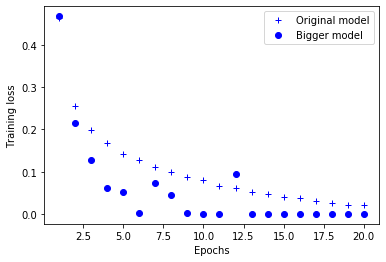

In [11]:
original_train_loss = original_hist.history['loss']
bigger_model_train_loss = bigger_model_hist.history['loss']

plt.plot(epochs, original_train_loss, 'b+', label='Original model')
plt.plot(epochs, bigger_model_train_loss, 'bo', label='Bigger model')
plt.xlabel('Epochs')
plt.ylabel('Training loss')
plt.legend()

plt.show()

Como pode ser visto no gráfico, o modelo mais complexo reduz o erro no treino rapidamente a zero. Porém este desempenho se dá por memorização de resultados (overfit) e não por aprendizado de padrões (generalização), pois ao ser apresentado a um conjunto de dados novos (os dados do conjunto de validação) seu erro não diminui. 

# Reduzindo o overfit pela regularização dos pesos

Pelos exemplos anteriores, percebe-se que dado o mesmo nível de erro o modelo "melhor" (isto é aquele com o menor overfit) é aquele mais simples. Em termos técnicos diminuimos a "entropia" (complexidade) do modelo, simplificando a estrutura da rede neural.

Este princípio pode ser aplicado também para os parâmetros a serem aprendidos pela rede (os pesos sinápticos). Neste caso colocamos restrições aos valores que os pesos podem assumir, forçando os mesmos a terem valores menores. Isto faz com que a distribuição dos pesos se torne mais "regular".

Este método (chamado de regularição dos pesos, ou "weight regularization" (em inglês) é executado pela inclusão de um _custo_ relacionado com os pesos, na função de erro da rede neural. 

A regularização pode ser feita de duas formas:

* Regularização L1, onde o custo adicionado é proporcional ao _valor absoluto dos pesos_ (ou "norma L1" dos pesos).

* Regularização L2 (também chamada de _decaimento dos pesos_, onde o custo adicionado é proporcional _ao quadrado do valor absoluto dos pesos_ (ou "norma L2" dos pesos). 

Na biblioteca Keras, a regularização dos pesos é incluida pelo parâmetro _kernel_regularizer_. No exemplo a seguir é incluida uma regularização do tipo L2 ao modelo de identificação do tipo de comentário, no dataset IMDB.

In [0]:
from keras import regularizers

l2_model = models.Sequential()

#outras formas de regularização: L1: regularizers.l1(l=0.01) ou 
#                                L1 e L2: regularizers.l1_l2(l1=0.01, l2=0.01)
l2_model.add(layers.Dense(16, kernel_regularizer=regularizers.l2(0.001),
                          activation='relu', input_shape=(10000,)))
l2_model.add(layers.Dense(16, kernel_regularizer=regularizers.l2(0.001),
                          activation='relu'))
l2_model.add(layers.Dense(1, activation='sigmoid'))

In [0]:
l2_model.compile(optimizer='rmsprop',
                 loss='binary_crossentropy',
                 metrics=['acc'])

`l2(0.001)` significa que será acrescido o valor `0.001 * weight_coefficient_value` para cada peso da rede neural à função de erro. 

Observe que esta "penalidade" é acrescida apenas no treino. Sendo assim o erro será sempre bem maior no conjunto de treino do que no conjunto de validação. 

Observe a seguir:

In [15]:
l2_model_hist = l2_model.fit(x_train, y_train,
                             epochs=20,
                             batch_size=512,
                             validation_data=(x_test, y_test))

Train on 25000 samples, validate on 25000 samples
Epoch 1/20
25000/25000 [==============================] - 2s 100us/step - loss: 0.5112 - acc: 0.8177 - val_loss: 0.3972 - val_acc: 0.8802
Epoch 2/20
25000/25000 [==============================] - 2s 85us/step - loss: 0.3285 - acc: 0.9040 - val_loss: 0.3412 - val_acc: 0.8876
Epoch 3/20
25000/25000 [==============================] - 2s 85us/step - loss: 0.2762 - acc: 0.9202 - val_loss: 0.3328 - val_acc: 0.8867
Epoch 4/20
25000/25000 [==============================] - 2s 86us/step - loss: 0.2553 - acc: 0.9277 - val_loss: 0.3321 - val_acc: 0.8869
Epoch 5/20
25000/25000 [==============================] - 2s 87us/step - loss: 0.2427 - acc: 0.9307 - val_loss: 0.3470 - val_acc: 0.8818
Epoch 6/20
25000/25000 [==============================] - 2s 86us/step - loss: 0.2320 - acc: 0.9357 - val_loss: 0.3442 - val_acc: 0.8833
Epoch 7/20
25000/25000 [==============================] - 2s 86us/step - loss: 0.2278 - acc: 0.9378 - val_loss: 0.3535 - val_ac

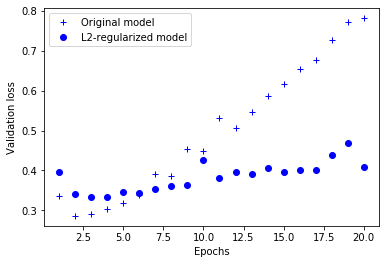

In [16]:
l2_model_val_loss = l2_model_hist.history['val_loss']

plt.plot(epochs, original_val_loss, 'b+', label='Original model')
plt.plot(epochs, l2_model_val_loss, 'bo', label='L2-regularized model')
plt.xlabel('Epochs')
plt.ylabel('Validation loss')
plt.legend()

plt.show()

Como pode ser visto, o modelo com regularização L2 (pontos) tornou-se muito mais resistente ao overfit que o modelo original (cruzes) mesmo tendo um número igual de parâmetros.

Abaixo é apresentado um resumo das formas de regularização disponíveis e da maneira de implementa-las.

In [0]:
from keras import regularizers

# Regularização L1
regularizers.l1(l=0.001)

# Regularização L2
regularizers.l2(l=0.001)

# Regularização L1 e L2 ao mesmo tempo
regularizers.l1_l2(l1=0.001, l2=0.001)

# Regularização dos pesos por eliminação arbitrária de resultados durante o treino (dropout)

A técnica de dropout é extremamente eficaz. Desenvolvida por Hinton (Universidade de Toronto), ela consiste na eliminação aleatória de alguns dos resultados de um nível durante o treino.

Suponha que uma camada normalmente retornaria o vetor `[0.2, 0.5, 1.3, 0.8, 1.1]` (para uma dada entrada do conjunto de treino). Após aplicar o dropout este vetor teria algumas entradas iguais a zero distribuidas de forma aleatória, tornand-se por exemplo: `[0, 0.5, 1.3, 0, 1.1]`. 

A taxa de dropout é a fração dos resultados em qualquer nível que estará sendo zerada. Ela é geralmente definida na faixa de 0.2 a 0.5

Durante o teste nenhum valor é zero. No entanto os valores de saida da camada que sofreu o dropout são multiplicados pela taxa de dropout aplicada à camada. Isto é feito para equilibrar o fato de mais unidades estarem ativas durante o teste do que durante o treino.

Como exemplo, suponha que uma rede esteja sendo treinada em batches de 5 amostras (`batch_size=5`) e uma de suas camadas tenha 8 neurons (`features=8`). 

In [17]:
taxa_dropout = 0.50
layer_output = np.array([[ 1,  2,  3,  4,  5,  6,  7,  8],
                         [ 9, 10, 11, 12, 13, 14, 15, 16],
                         [17, 18, 19, 20, 21, 22, 23, 24],
                         [25, 26, 27, 28, 29, 30, 31, 32],
                         [33, 34, 35, 36, 37, 38, 39, 40]])
layer_output

array([[ 1,  2,  3,  4,  5,  6,  7,  8],
       [ 9, 10, 11, 12, 13, 14, 15, 16],
       [17, 18, 19, 20, 21, 22, 23, 24],
       [25, 26, 27, 28, 29, 30, 31, 32],
       [33, 34, 35, 36, 37, 38, 39, 40]])

A função randint vai selecionar números inteiros entre low e high-1 (neste caso entre 0 e 1) com igual probabilidade, e armazena-los em uma matriz com o formato definido em size.

In [19]:
layer_dropout = np.random.randint(low = 0, high = 2, size=layer_output.shape)
layer_dropout

array([[0, 1, 0, 0, 1, 1, 1, 0],
       [0, 1, 1, 1, 0, 0, 0, 1],
       [0, 1, 0, 1, 0, 0, 0, 1],
       [1, 0, 0, 1, 0, 1, 0, 1],
       [1, 1, 1, 0, 1, 1, 0, 0]])

Durante o treino a multiplicação elemento a elemento de layer_output por layer_dropout executa o processo de eliminação de alguns resultados ao acaso. Observe a seguir:

In [20]:
layer_output_dropout = layer_output * layer_dropout
layer_output_dropout

array([[ 0,  2,  0,  0,  5,  6,  7,  0],
       [ 0, 10, 11, 12,  0,  0,  0, 16],
       [ 0, 18,  0, 20,  0,  0,  0, 24],
       [25,  0,  0, 28,  0, 30,  0, 32],
       [33, 34, 35,  0, 37, 38,  0,  0]])


Durante o teste os valores de saida seriam multiplicados (escalonados) pela taxa de dropout (neste caso 0.50):

In [21]:
layer_output_teste = layer_output * taxa_dropout
layer_output_teste

array([[ 0.5,  1. ,  1.5,  2. ,  2.5,  3. ,  3.5,  4. ],
       [ 4.5,  5. ,  5.5,  6. ,  6.5,  7. ,  7.5,  8. ],
       [ 8.5,  9. ,  9.5, 10. , 10.5, 11. , 11.5, 12. ],
       [12.5, 13. , 13.5, 14. , 14.5, 15. , 15.5, 16. ],
       [16.5, 17. , 17.5, 18. , 18.5, 19. , 19.5, 20. ]])

Outra forma de implementar este processo é executar o dropout E o escalonamento (porém de forma invertida, dividindo pela taxa de dropout) durante o treino e deixando o resultado da camada igual no teste. Veja a seguir:


In [22]:
taxa_dropout = 0.50
layer_treino = np.array([[ 1,  2,  3,  4,  5,  6,  7,  8],
                         [ 9, 10, 11, 12, 13, 14, 15, 16],
                         [17, 18, 19, 20, 21, 22, 23, 24],
                         [25, 26, 27, 28, 29, 30, 31, 32],
                         [33, 34, 35, 36, 37, 38, 39, 40]])
layer_treino = layer_treino * np.random.randint(low = 0, high = 2, size=layer_output.shape)
layer_treino = layer_treino / taxa_dropout
layer_treino

array([[ 0.,  0.,  6.,  0.,  0.,  0., 14.,  0.],
       [18.,  0.,  0.,  0., 26., 28., 30., 32.],
       [ 0.,  0., 38.,  0., 42.,  0.,  0.,  0.],
       [50., 52.,  0., 56.,  0., 60.,  0.,  0.],
       [66.,  0., 70.,  0.,  0.,  0., 78.,  0.]])

O racional desta técnica é evitar que os padrões derivados do ruido possam se formar nos pesos da rede neural, pela eliminação aleatória de alguns resultados durante o treino. 

Esta eliminação aleatória de resultados em uma camada equivale a introduzir ruido no nível para justamente evitar o aparecimento de ruido nos padrões de saida da rede. 



Na Keras o dropout é introduzido em uma camada pelo acréscimo de uma camada de dropout (através do método `Dropout`) conforme pode ser visto a seguir.

No exemplo aplicamos um dropout de 50% em duas camadas intermediárias no caso do modelo simples utilizado para prever os resultados do conjunto de dados IMDB.

In [23]:
dpt_model = models.Sequential()
dpt_model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
dpt_model.add(layers.Dropout(0.5))
dpt_model.add(layers.Dense(16, activation='relu'))
dpt_model.add(layers.Dropout(0.5))
dpt_model.add(layers.Dense(1, activation='sigmoid'))

dpt_model.compile(optimizer='rmsprop',
                  loss='binary_crossentropy',
                  metrics=['acc'])


Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


Após criar o modelo executamos e gravamos o histórico de treino do mesmo.

In [24]:
dpt_model_hist = dpt_model.fit(x_train, y_train,
                               epochs=20,
                               batch_size=512,
                               validation_data=(x_test, y_test))

Train on 25000 samples, validate on 25000 samples
Epoch 1/20
25000/25000 [==============================] - 3s 102us/step - loss: 0.5951 - acc: 0.6843 - val_loss: 0.4585 - val_acc: 0.8573
Epoch 2/20
25000/25000 [==============================] - 2s 87us/step - loss: 0.4513 - acc: 0.8083 - val_loss: 0.3407 - val_acc: 0.8820
Epoch 3/20
25000/25000 [==============================] - 2s 88us/step - loss: 0.3650 - acc: 0.8586 - val_loss: 0.2931 - val_acc: 0.8882
Epoch 4/20
25000/25000 [==============================] - 2s 88us/step - loss: 0.3011 - acc: 0.8884 - val_loss: 0.2781 - val_acc: 0.8885
Epoch 5/20
25000/25000 [==============================] - 2s 88us/step - loss: 0.2671 - acc: 0.9073 - val_loss: 0.2772 - val_acc: 0.8883
Epoch 6/20
25000/25000 [==============================] - 2s 88us/step - loss: 0.2335 - acc: 0.9180 - val_loss: 0.2890 - val_acc: 0.8881
Epoch 7/20
25000/25000 [==============================] - 2s 87us/step - loss: 0.2116 - acc: 0.9294 - val_loss: 0.3047 - val_ac

Os resultados são apresentados a seguir em forma gráfica:

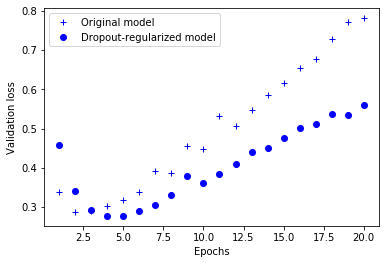

In [25]:
dpt_model_val_loss = dpt_model_hist.history['val_loss']

plt.plot(epochs, original_val_loss, 'b+', label='Original model')
plt.plot(epochs, dpt_model_val_loss, 'bo', label='Dropout-regularized model')
plt.xlabel('Epochs')
plt.ylabel('Validation loss')
plt.legend()

plt.show()


Como pode ser visto o overfit do modelo começa depois do overfit do modelo original e cresce de forma mais lenta

# Resumo

As técnicas mais comuns para evitar o overfit em redes neurais são:

* Obter mais dados para treino.
* Reduzir a complexidade da rede.
* Utilizar regularização dos pesos (L1, L2, ou ambas).
* Acrescentar camadas de dropout.

# Exercícios

*   Partindo de uma rede neural com as características descritas abaixo, determine o número de épocas e o valor do erro no conjunto de teste (ou de validação neste caso) quando o erro no teste torna-se aproximadamente igual ao erro no conjunto de treino.
      * Rede do tipo sequencial, camada de entrada recebe tensor 1D com formato (10000,), três camadas, sendo duas intermediárias com 16 neurons cada e função de ativação `relu` e uma camada de saida com um neuron e função de ativação `sigmoid`, otimizador:'rmsprop', função de erro:'binary_crossentropy' e métrica de desempenho: 'acc'

1. Rede neural com camadas de [4,4,1] neurons
2. Rede neural com camadas de [16,16,1] neurons
3. Rede neural com camadas de [64, 64, 1] neurons
4. Rede neural com camadas de [128, 128, 1] neurons
5. Rede neural com camadas de [1024, 1024, 1] neurons
6. Rede neural com camadas de [4,4,1] neurons e pesos com regularização L1
7. Rede neural com camadas de [4,4,1] neurons e pesos com regularização L2
8. Rede neural com camadas de [4,4,1] neurons e pesos com regularização L1_L2
9. Rede neural com camadas de [16,16,1] neurons e pesos com regularização L1
10. Rede neural com camadas de [16,16,1] neurons e pesos com regularização L2
11. Rede neural com camadas de [16,16,1] neurons e pesos com regularização L1_L2
12. Rede neural com camadas de [4,4,1] e dropout de 50%
13. Rede neural com camadas de [16,16,1] e dropout de 50%
14. Rede neural com camadas de [4,4,1], regularização L1_L2 e dropout de 50%
15. Rede neural com camadas de [16,16,1], regularização L1_L2 e dropout de 50%
